In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as mlt

In [14]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv.putText(img, label, (x-10,y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [15]:
image = cv.imread('images\dog.jpg')

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

classes = "yolo/yolov3.txt"

with open(classes, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

net = cv.dnn.readNet("yolo/yolov3.weights", 'yolo/yolov3.cfg')

blob = cv.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)

outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4


for out in outs:
#     print(out)
    for detection in out:
#         print(detection)
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            print(center_x,center_y)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    print(classes[class_ids[i]])
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# cv.imshow("object detection", image)
# cv.waitKey()
    
# cv.imwrite("object-detection.jpg", image)
# cv.destroyAllWindows()

582 126
595 127
581 134
342 260
343 259
366 259
343 278
338 286
364 275
360 280
215 340
221 383
240 377
217 402
dog
bicycle
truck


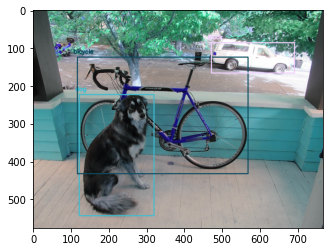

In [4]:
mlt.imshow(image)